In [1]:
import pandas as pd
import numpy as np
data=pd.Series(np.random.randn(9),index=[['a','a','a','b','b','b','c','c','c'],[1,2,3,4,5,6,7,8,9]])
print(data)
print(data.index)

a  1    0.910201
   2   -0.382419
   3    0.359844
b  4   -1.878819
   5   -0.571792
   6   -0.025172
c  7    0.695012
   8   -1.462124
   9    1.066590
dtype: float64
MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 4),
            ('b', 5),
            ('b', 6),
            ('c', 7),
            ('c', 8),
            ('c', 9)],
           )


In [2]:
print(data['b':'c'])
print(data.loc[['b','c']])
print(data.loc[:,[2,5]])

b  4   -1.878819
   5   -0.571792
   6   -0.025172
c  7    0.695012
   8   -1.462124
   9    1.066590
dtype: float64
b  4   -1.878819
   5   -0.571792
   6   -0.025172
c  7    0.695012
   8   -1.462124
   9    1.066590
dtype: float64
a  2   -0.382419
b  5   -0.571792
dtype: float64


In [3]:
print(data.unstack())


          1         2         3         4         5         6         7  \
a  0.910201 -0.382419  0.359844       NaN       NaN       NaN       NaN   
b       NaN       NaN       NaN -1.878819 -0.571792 -0.025172       NaN   
c       NaN       NaN       NaN       NaN       NaN       NaN  0.695012   

          8        9  
a       NaN      NaN  
b       NaN      NaN  
c -1.462124  1.06659  


In [4]:
print(data.unstack().stack())

a  1    0.910201
   2   -0.382419
   3    0.359844
b  4   -1.878819
   5   -0.571792
   6   -0.025172
c  7    0.695012
   8   -1.462124
   9    1.066590
dtype: float64


In [5]:
df=pd.DataFrame(np.arange(12).reshape(4,3),index=[['a','b','c','d'],[1,1,2,2]],columns=[['ankit','kiio','summi'],['ankit','kiio','kiio']])
print(df)

    ankit kiio summi
    ankit kiio  kiio
a 1     0    1     2
b 1     3    4     5
c 2     6    7     8
d 2     9   10    11


In [6]:
df.index.names=['key1','key2']
df.columns.names=['column1','column2']
print(df)

column1   ankit kiio summi
column2   ankit kiio  kiio
key1 key2                 
a    1        0    1     2
b    1        3    4     5
c    2        6    7     8
d    2        9   10    11


In [7]:
df['ankit']

,column2,ankit
key1,key2,
a,1,0
b,1,3
c,2,6
d,2,9


In [8]:
print(pd.MultiIndex.from_arrays([['ankit','kiio','summi'],['kiio','kiio','summi']],names=['column1','column2']))

MultiIndex([('ankit',  'kiio'),
            ( 'kiio',  'kiio'),
            ('summi', 'summi')],
           names=['column1', 'column2'])


In [9]:
print(df.swaplevel('key2','key1'))

column1   ankit kiio summi
column2   ankit kiio  kiio
key2 key1                 
1    a        0    1     2
     b        3    4     5
2    c        6    7     8
     d        9   10    11


In [10]:
print(df.sort_index(level=1))

column1   ankit kiio summi
column2   ankit kiio  kiio
key1 key2                 
a    1        0    1     2
b    1        3    4     5
c    2        6    7     8
d    2        9   10    11


In [11]:
print(df.swaplevel(0, 1).sort_index(level=0))

column1   ankit kiio summi
column2   ankit kiio  kiio
key2 key1                 
1    a        0    1     2
     b        3    4     5
2    c        6    7     8
     d        9   10    11


In [12]:
print(df.sum(level='key2'))

column1 ankit kiio summi
column2 ankit kiio  kiio
key2                    
1           3    5     7
2          15   17    19


C:\Users\ankit19.gupta\AppData\Local\Temp\ipykernel_3652\684321041.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  print(df.sum(level='key2'))


In [13]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),'c': ['one', 'one', 'one', 'two', 'two','two', 'two'],'d': [0, 1, 2, 0, 1, 2, 3]})
frame2 = frame.set_index(['c', 'd'])
print(frame2)

       a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1


In [14]:
print(frame2.reset_index())

     c  d  a  b
0  one  0  0  7
1  one  1  1  6
2  one  2  2  5
3  two  0  3  4
4  two  1  4  3
5  two  2  5  2
6  two  3  6  1


In [15]:
df1=pd.DataFrame({'key':['a','b','c','a','b'],'name':['ankit','kiio','soumi','summi','samiksha']})
df2=pd.DataFrame({'key':['a','b'],'Marks':[80,100]})
print(df1)
print(df2)
print(pd.merge(df1,df2))
print(pd.merge(df1,df2,on='key'))

  key      name
0   a     ankit
1   b      kiio
2   c     soumi
3   a     summi
4   b  samiksha
  key  Marks
0   a     80
1   b    100
  key      name  Marks
0   a     ankit     80
1   a     summi     80
2   b      kiio    100
3   b  samiksha    100
  key      name  Marks
0   a     ankit     80
1   a     summi     80
2   b      kiio    100
3   b  samiksha    100


In [16]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],'data2': range(3)})
print(pd.merge(df3, df4, left_on='lkey', right_on='rkey'))

  lkey  data1 rkey  data2
0    b      0    b      1
1    b      1    b      1
2    b      6    b      1
3    a      2    a      0
4    a      4    a      0
5    a      5    a      0


In [17]:
print(pd.merge(df1, df2, how='outer'))

  key      name  Marks
0   a     ankit   80.0
1   a     summi   80.0
2   b      kiio  100.0
3   b  samiksha  100.0
4   c     soumi    NaN


In [18]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],'key2': ['one', 'two', 'one'],'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],'key2': ['one', 'one', 'one', 'two'],'rval': [4, 5, 6, 7]})
print(pd.merge(left, right, on=['key1', 'key2'], how='outer'))

  key1 key2  lval  rval
0  foo  one   1.0   4.0
1  foo  one   1.0   5.0
2  foo  two   2.0   NaN
3  bar  one   3.0   6.0
4  bar  two   NaN   7.0


In [19]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],'key2': ['one', 'two', 'one'],'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],'key2': ['one', 'one', 'one', 'two'],'rval': [4, 5, 6, 7]})
print(left)
print(right)
print(pd.merge(left, right, on='key1', suffixes=('_left', '_right')))

  key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3
  key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7
  key1 key2_left  lval key2_right  rval
0  foo       one     1        one     4
1  foo       one     1        one     5
2  foo       two     2        one     4
3  foo       two     2        one     5
4  bar       one     3        one     6
5  bar       one     3        two     7


In [20]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
print(left1)
print(right1)
print(pd.merge(left1, right1, left_on='key', right_index=True, how='outer'))

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0
  key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN


In [21]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],index=['a', 'c', 'e'],columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],index=['b', 'c', 'd', 'e'],columns=['Missouri', 'Alabama'])
print(left2)
print(right2)
print(pd.merge(left2, right2, how='outer', left_index=True, right_index=True))

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0
   Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0


In [22]:
print(left2.join(right2, how='outer'))

   Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0


In [23]:
print(left1.join(right1, on='key'))

  key  value  group_val
0   a      0        3.5
1   b      1        7.0
2   a      2        3.5
3   a      3        3.5
4   b      4        7.0
5   c      5        NaN


In [24]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],index=['a', 'c', 'e'],columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],index=['b', 'c', 'd', 'e'],columns=['Missouri', 'Alabama'])
print(left2)
print(right2)
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],index=['a', 'c', 'e', 'f'],columns=['New York', 'Oregon'])
print(another)
print(left2.join([right2, another], how='outer'))

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0
   New York  Oregon
a       7.0     8.0
c       9.0    10.0
e      11.0    12.0
f      16.0    17.0
   Ohio  Nevada  Missouri  Alabama  New York  Oregon
a   1.0     2.0       NaN      NaN       7.0     8.0
c   3.0     4.0       9.0     10.0       9.0    10.0
e   5.0     6.0      13.0     14.0      11.0    12.0
b   NaN     NaN       7.0      8.0       NaN     NaN
d   NaN     NaN      11.0     12.0       NaN     NaN
f   NaN     NaN       NaN      NaN      16.0    17.0


In [25]:
arr = np.arange(12).reshape((3, 4))
print(np.concatenate([arr, arr], axis=1))

[[ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]]


In [26]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
print(pd.concat([s1, s2, s3]))

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64


In [27]:
print(pd.concat([s1, s2, s3], axis=1))

     0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0


In [28]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s4 = pd.concat([s1, s3])
print(s1)
print(s4)
print(pd.concat([s1, s4], axis=1, join='inner'))

a    0
b    1
dtype: int64
a    0
b    1
f    5
g    6
dtype: int64
   0  1
a  0  0
b  1  1


In [29]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
print(result)
print(result.unstack())
print(pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three']))

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64
         a    b    f    g
one    0.0  1.0  NaN  NaN
two    0.0  1.0  NaN  NaN
three  NaN  NaN  5.0  6.0
   one  two  three
a  0.0  NaN    NaN
b  1.0  NaN    NaN
c  NaN  2.0    NaN
d  NaN  3.0    NaN
e  NaN  4.0    NaN
f  NaN  NaN    5.0
g  NaN  NaN    6.0


In [30]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],columns=['three', 'four'])
print(df1)
print(df2)
print(pd.concat([df1, df2], axis=1, keys=['level1', 'level2']))

   one  two
a    0    1
b    2    3
c    4    5
   three  four
a      5     6
c      7     8
  level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0


In [31]:
print(pd.concat({'level1': df1, 'level2': df2}, axis=1))

  level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0


In [32]:
print(pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],names=['upper', 'lower']))

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0


In [33]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),index=pd.Index(['Ohio', 'Colorado'], name='state'),columns=pd.Index(['one', 'two', 'three'],name='number'))
print(data)

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [34]:
result = data.stack()
print(result)

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32


In [35]:
print(result.unstack())

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [36]:
print(result.unstack(0))

state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5


In [37]:
df = pd.DataFrame({'left': result, 'right': result + 5},columns=pd.Index(['left', 'right'], name='side'))
print(df)
print(df.unstack('state'))
print(df.unstack('state').stack('side'))

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10
side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10
state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7


In [38]:
data = pd.read_csv('macrodata.csv')
print(data.head(2))

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  


In [39]:
data = pd.read_csv('macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [40]:
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,name='date')
print(index)
columns=pd.Index(['realgdp','infl','unemp'],name='item')
print(columns)
data=data.reindex(columns=columns)
print(data)
data.index=index.to_timestamp('D','end')
print(data.index)

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)
Index(['realgdp', 'infl', 'unemp'], dtype='object', name='item')
item    realgdp  infl  unemp
0      2710.349  0.00    5.8
1      2778.801  2.34    5.1
2      2775.488  2.74    5.3
3      2785.204  0.27    5.6
4      2847.699  2.31    5.2
..          ...   ...    ...
198   13324.600 -3.16    6.0
199   13141.920 -8.79    6.9
200   12925.410  0.94    8.1
201   12901.504  3.37    9.2
202   12990.341  3.56    9.6

[203 rows x 3 columns]
DatetimeIndex(['1959-03-31 23:59:59.999999999',
               '1959-06-30 23:59:59.999999999',
               '1959-09-30 23:59:59.999999999',
               '1959-12-31 23:59:59.999999999',
               '1960-03-31 23:59:59.99999

In [41]:
ldata=data.stack().reset_index().rename(columns={0:'value'})

In [42]:
pivoted=ldata.pivot('date', 'item', 'value')

C:\Users\ankit19.gupta\AppData\Local\Temp\ipykernel_3652\293750957.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted=ldata.pivot('date', 'item', 'value')


In [43]:
pivoted = ldata.pivot('date', 'item')
print(pivoted[:5])

                              value                
item                           infl   realgdp unemp
date                                               
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2


C:\Users\ankit19.gupta\AppData\Local\Temp\ipykernel_3652\3792140263.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted = ldata.pivot('date', 'item')


In [44]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
print(unstacked)

                              value                 
item                           infl    realgdp unemp
date                                                
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2
...                             ...        ...   ...
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6

[203 rows x 3 columns]


In [45]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],'A': [1, 2, 3],'B': [4, 5, 6],'C': [7, 8, 9]})
print(df)

   key  A  B  C
0  foo  1  4  7
1  bar  2  5  8
2  baz  3  6  9


In [46]:
melted = pd.melt(df, ['key'])
print(melted)

   key variable  value
0  foo        A      1
1  bar        A      2
2  baz        A      3
3  foo        B      4
4  bar        B      5
5  baz        B      6
6  foo        C      7
7  bar        C      8
8  baz        C      9


In [47]:
reshaped=melted.pivot('key','variable','value')
print(reshaped)

variable  A  B  C
key              
bar       2  5  8
baz       3  6  9
foo       1  4  7


C:\Users\ankit19.gupta\AppData\Local\Temp\ipykernel_3652\4024991713.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  reshaped=melted.pivot('key','variable','value')


In [48]:
print(reshaped.reset_index())

variable  key  A  B  C
0         bar  2  5  8
1         baz  3  6  9
2         foo  1  4  7


In [49]:
print(pd.melt(df, id_vars=['key'], value_vars=['A', 'B']))

   key variable  value
0  foo        A      1
1  bar        A      2
2  baz        A      3
3  foo        B      4
4  bar        B      5
5  baz        B      6


In [50]:
%matplotlib notebook

<IPython.core.display.Javascript object>


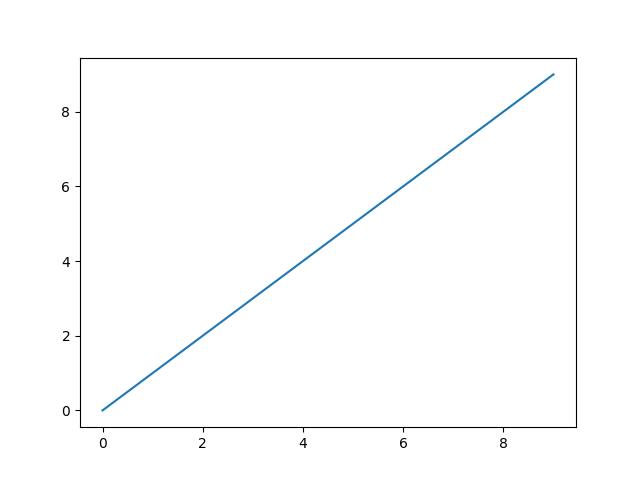

In [51]:
import numpy as np
import matplotlib.pyplot as plt
data=np.arange(10)
plt.plot(data)

<IPython.core.display.Javascript object>


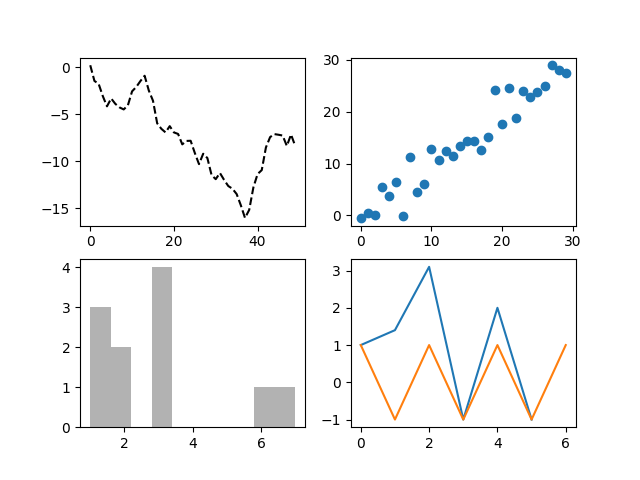

(array([3., 2., 0., 4., 0., 0., 0., 0., 1., 1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

In [52]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
plt.plot([1,1.4,3.1,-1,2,-1])
plt.plot([1,-1,1,-1,1,-1,1])
ax1.plot(np.random.randn(50).cumsum(), 'k--')
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.hist([1,2,1,1,3,3,3,3,2,6,7], bins=10, color='k', alpha=0.3)

<IPython.core.display.Javascript object>


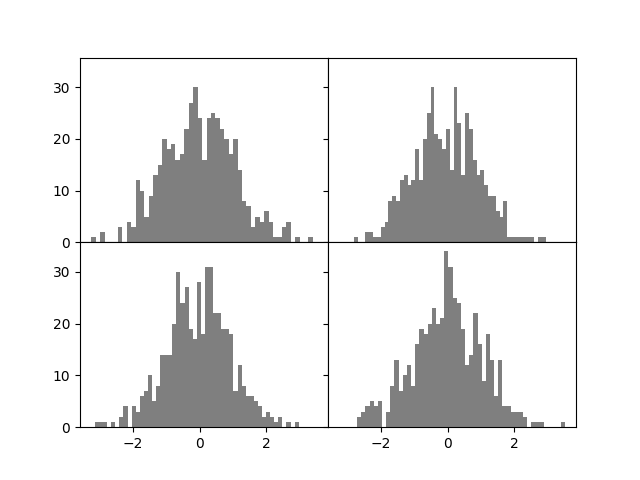

In [53]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [54]:
plt?

<IPython.core.display.Javascript object>


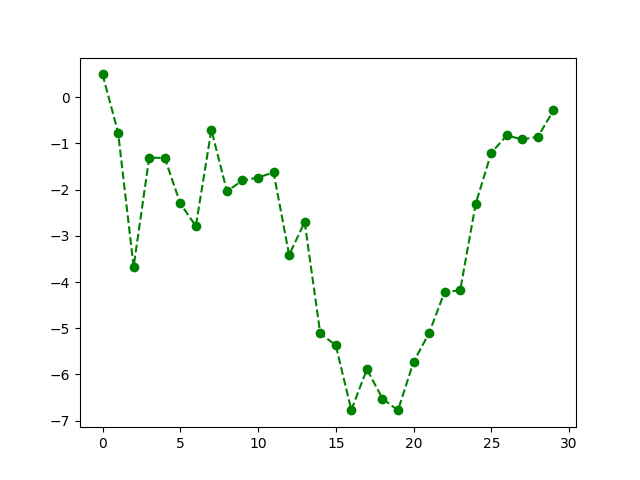

In [55]:
fig=plt.figure()
plt.plot(np.random.randn(30).cumsum(), color='green', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


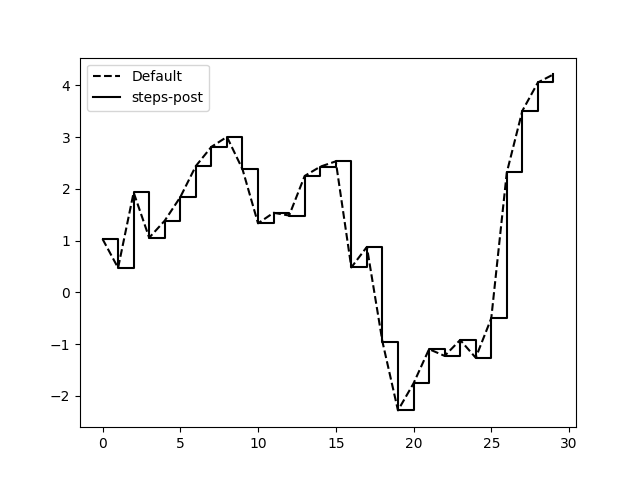

In [56]:
data = np.random.randn(30).cumsum()
fig=plt.figure()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

<IPython.core.display.Javascript object>


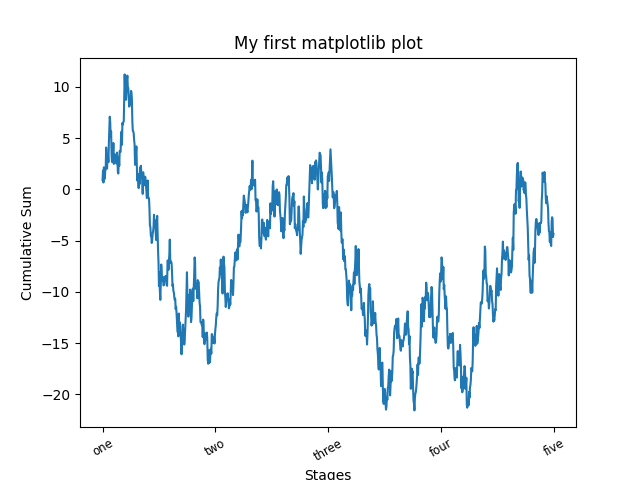

Text(0, 0.5, 'Cumulative Sum')

In [57]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks =ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Cumulative Sum')

<IPython.core.display.Javascript object>


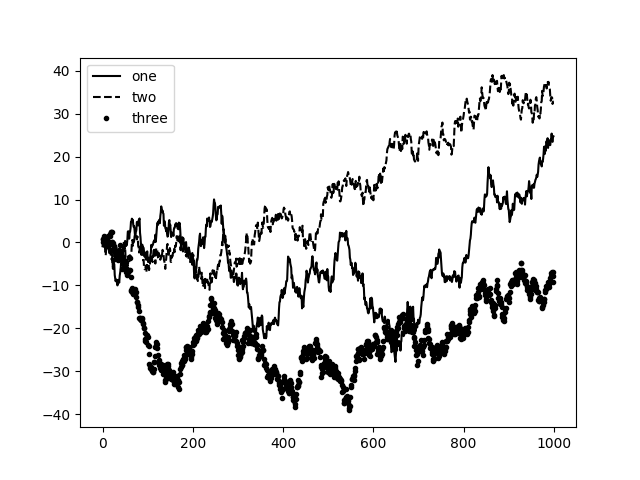

In [58]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

In [59]:
# ax.text(x, y, 'Hello world!',family='monospace', fontsize=10)


NameError: name 'x' is not defined

<IPython.core.display.Javascript object>


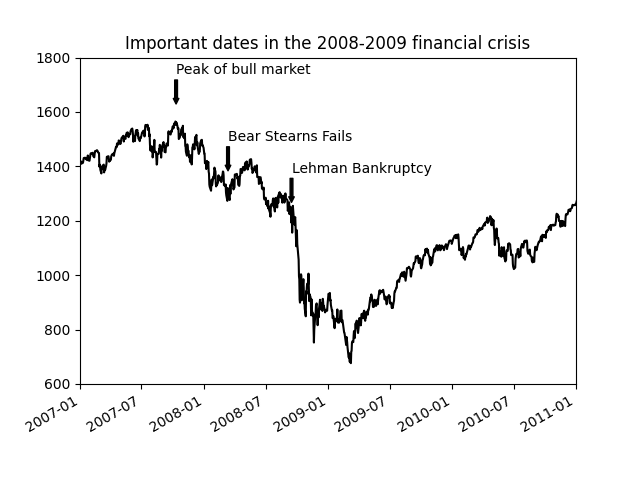

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [62]:
import pandas as pd
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
 (datetime(2007, 10, 11), 'Peak of bull market'),
 (datetime(2008, 3, 12), 'Bear Stearns Fails'),
 (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),xytext=(date, spx.asof(date) + 225),arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4),
    horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


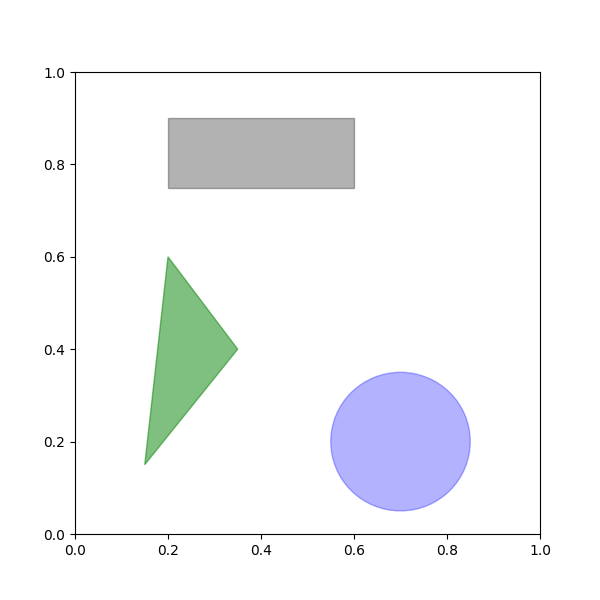

In [68]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
rect=plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ=plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
poly=plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(poly)

In [65]:
plt.savefig('shapes.png',dpi=400,bbox_inches='tight')

In [66]:
plt.savefig('shapes.pdf',dpi=400,bbox_inches='tight')

In [67]:
plt.rc('figure', figsize=(6, 6))

<IPython.core.display.Javascript object>


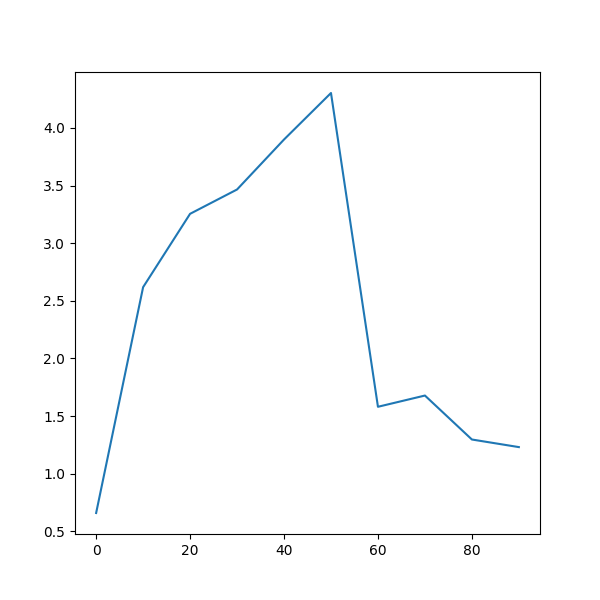

<Axes: >

In [69]:
fig = plt.figure()
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<IPython.core.display.Javascript object>


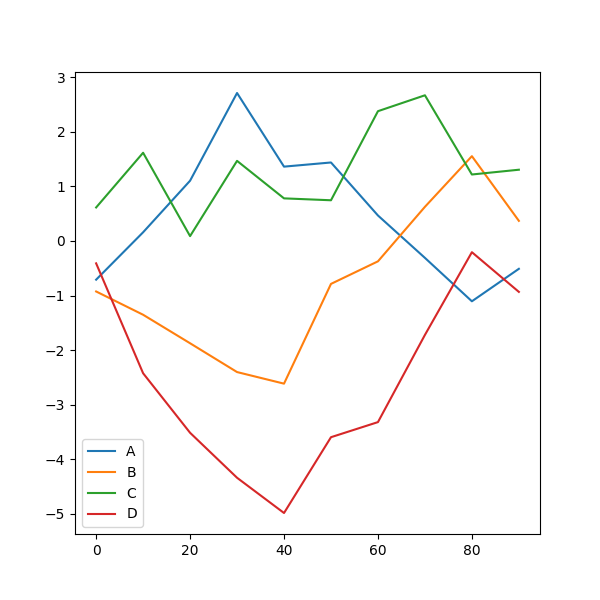

<Axes: >

In [70]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df.plot()

<IPython.core.display.Javascript object>


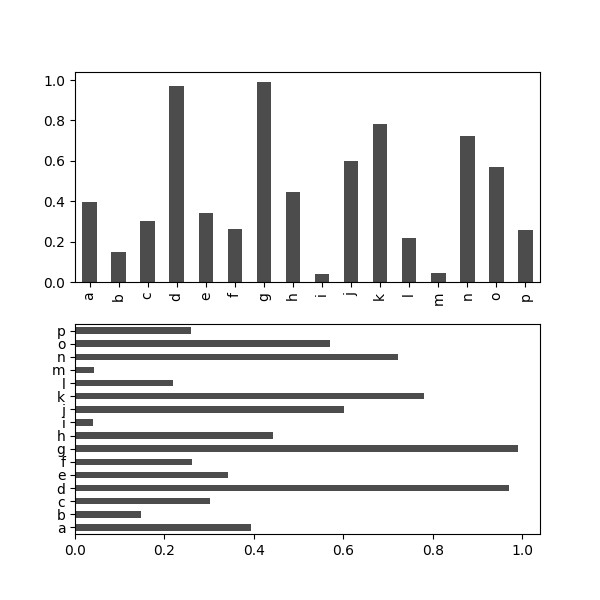

<Axes: >

In [72]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<IPython.core.display.Javascript object>


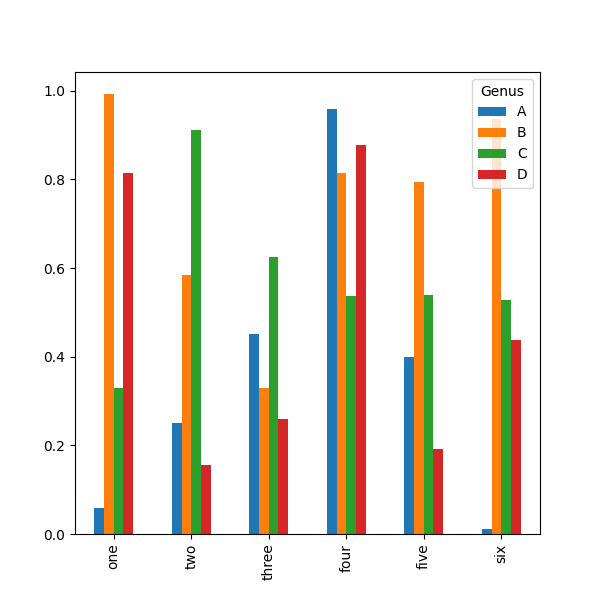

<Axes: >

In [73]:
df = pd.DataFrame(np.random.rand(6, 4),index=['one', 'two', 'three', 'four', 'five', 'six'],columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

<IPython.core.display.Javascript object>


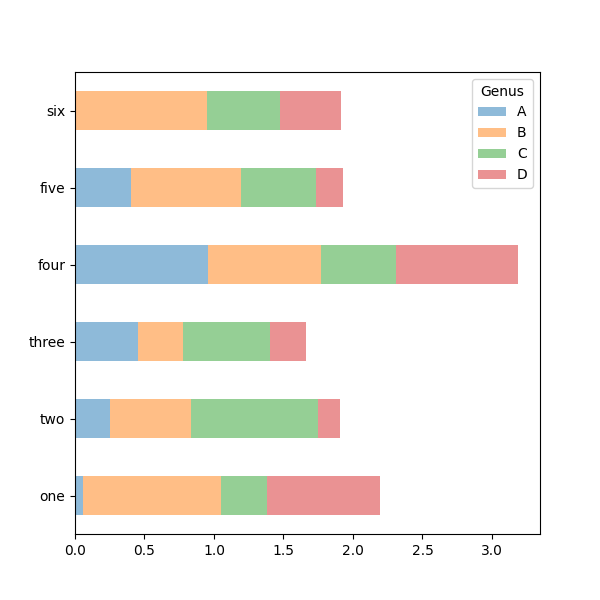

<Axes: >

In [74]:
df.plot.barh(stacked=True, alpha=0.5)

In [77]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
print(party_counts)

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


In [78]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
print(party_pcts)

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241


<IPython.core.display.Javascript object>


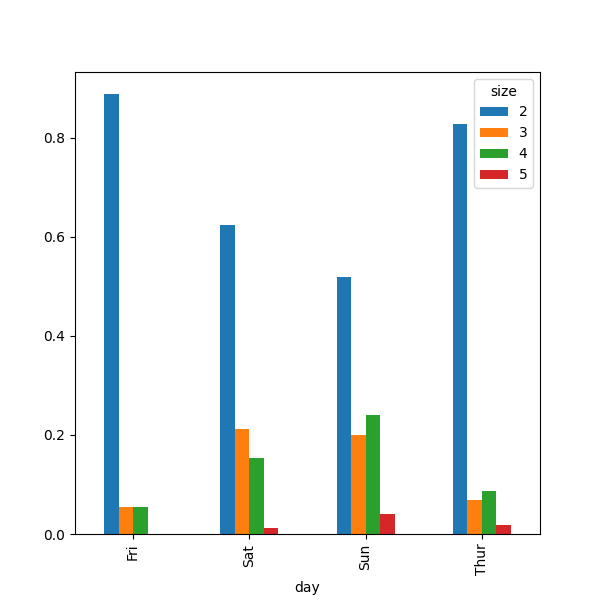

<Axes: xlabel='day'>

In [79]:
party_pcts.plot.bar()

In [82]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.063204
1       10.34  1.66    Male     No  Sun  Dinner     3  0.191244
2       21.01  3.50    Male     No  Sun  Dinner     3  0.199886
3       23.68  3.31    Male     No  Sun  Dinner     2  0.162494
4       24.59  3.61  Female     No  Sun  Dinner     4  0.172069


<IPython.core.display.Javascript object>


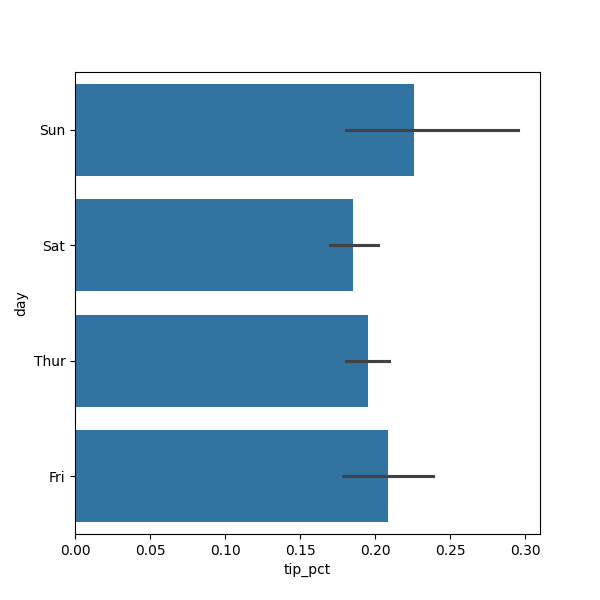

<Axes: xlabel='tip_pct', ylabel='day'>

In [84]:
fig=plt.figure()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


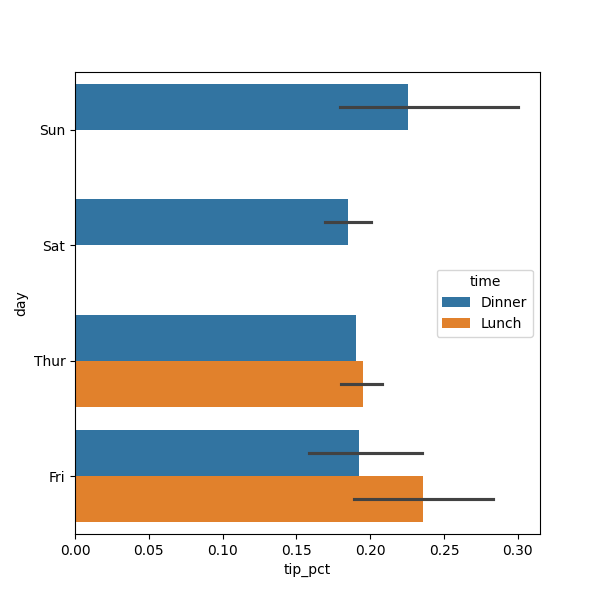

<Axes: xlabel='tip_pct', ylabel='day'>

In [85]:
fig=plt.figure()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

<IPython.core.display.Javascript object>


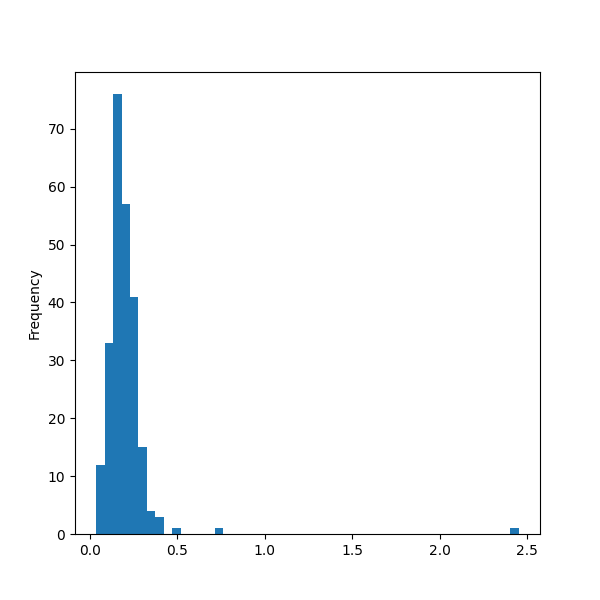

<Axes: ylabel='Frequency'>

In [86]:
fig=plt.figure()
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


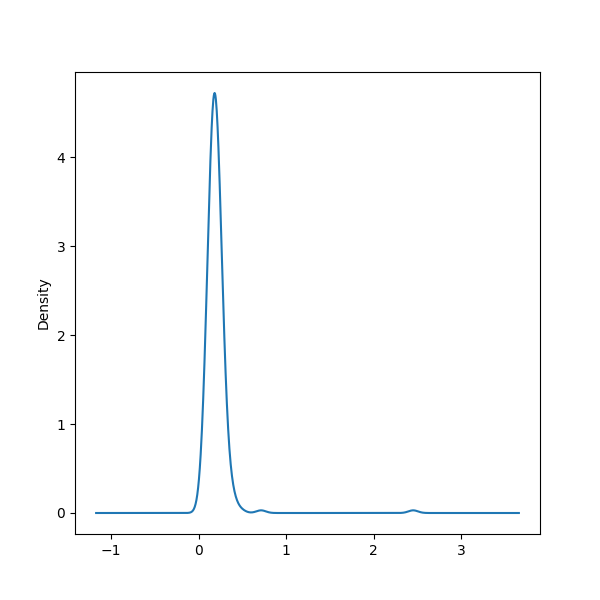

<Axes: ylabel='Density'>

In [87]:
fig=plt.figure()
tips['tip_pct'].plot.density()

<IPython.core.display.Javascript object>


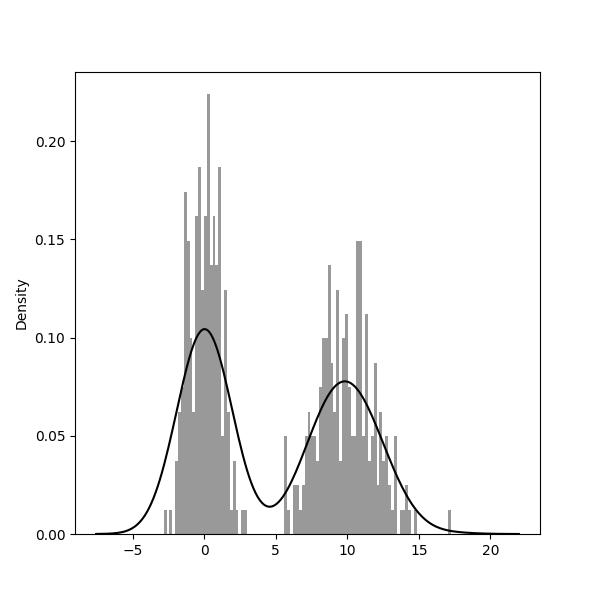

C:\Users\ankit19.gupta\AppData\Local\Temp\ipykernel_3652\3472363609.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, bins=100, color='k')


<Axes: ylabel='Density'>

In [88]:
fig=plt.figure()
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

In [89]:
values

0      -0.347706
1       0.886780
2      -1.403438
3       0.101975
4      -1.701017
         ...    
395    12.576861
396    13.309322
397    10.793200
398    10.751603
399     8.655183
Length: 400, dtype: float64

In [91]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
print(trans_data[-5:])

          cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560


<IPython.core.display.Javascript object>


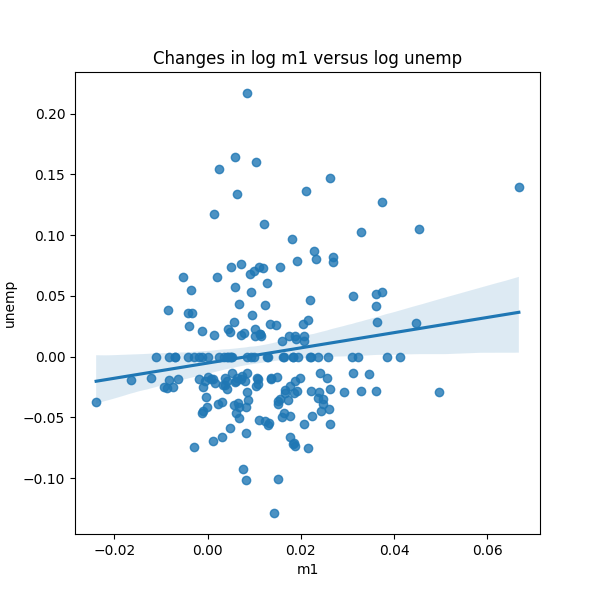

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [96]:
fig=plt.figure()
sns.regplot(x='m1',y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

<IPython.core.display.Javascript object>


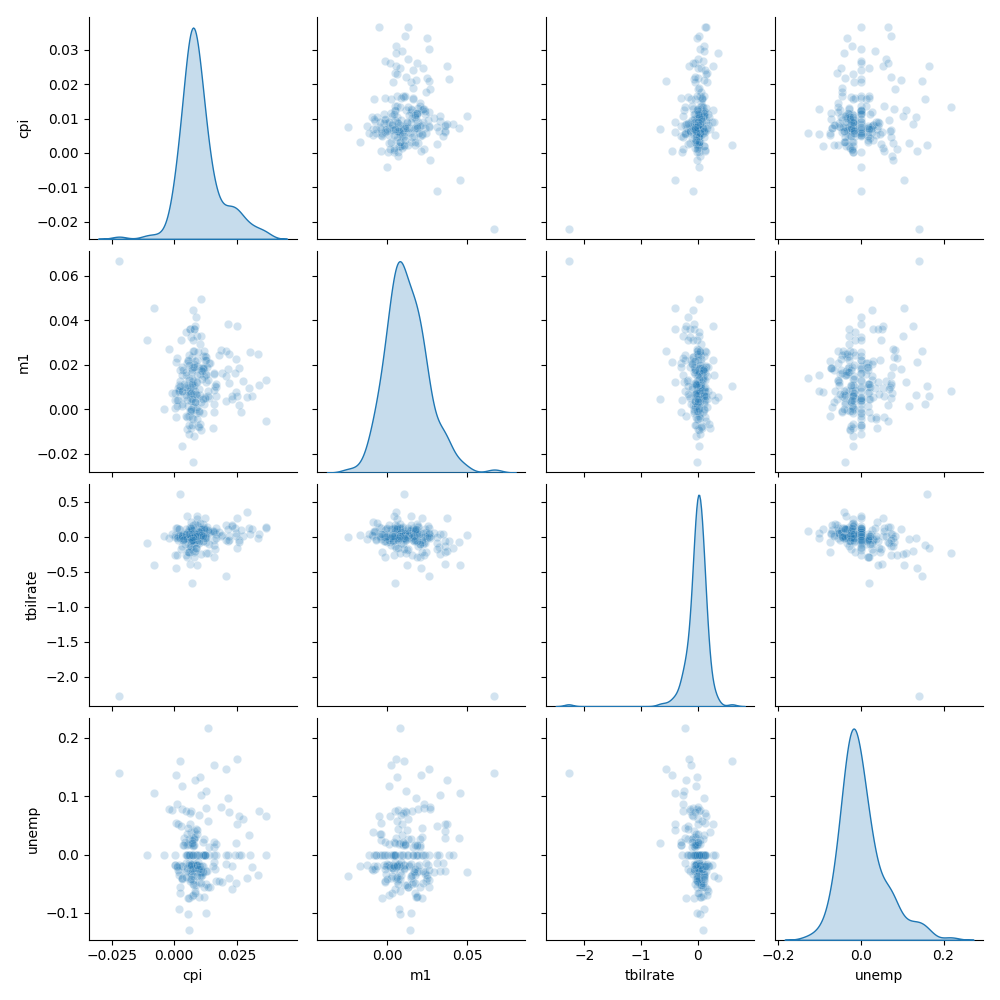

In [95]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

<IPython.core.display.Javascript object>


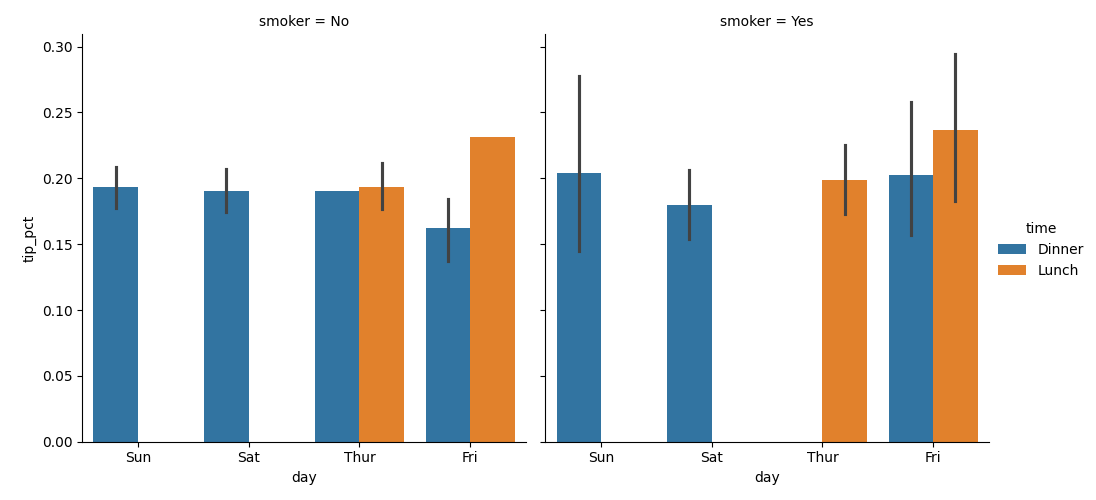

In [98]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


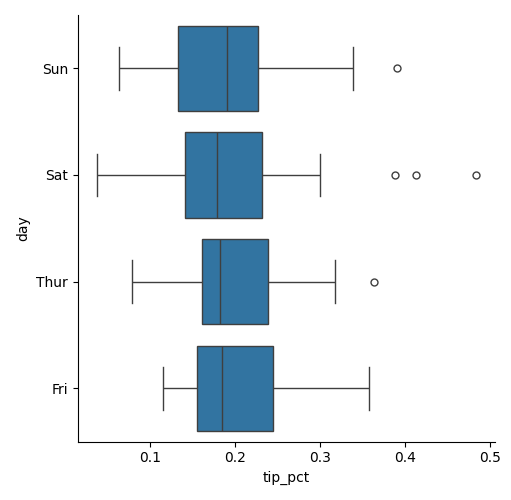

In [99]:
sns.catplot(x='tip_pct', y='day', kind='box',data=tips[tips.tip_pct < 0.5])
